In [36]:
import networkx as nx
import networkx.algorithms.bipartite as bp
import scipy as sp
import numpy as np

In [37]:
models = [bp.complete_bipartite_graph,
          bp.configuration_model,
          bp.havel_hakimi_graph]

In [38]:
def bipartite_set_0(G):
    nodes = [n for n, attrs in G.nodes.data() if attrs['bipartite'] == 0]
    return nodes

In [39]:
def draw_bipartite(G):
    nx.draw(G, pos=nx.bipartite_layout(G, nodes=bipartite_set_0(G)))

## Configuration model test

In [40]:
G = bp.configuration_model([3,3,3,3, 2, 2, 1], [4,5,4,2,2])

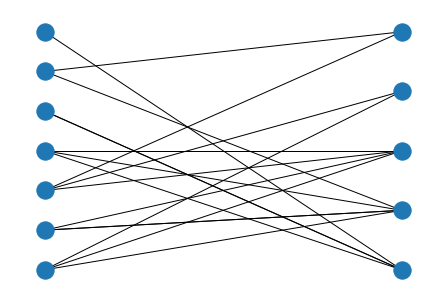

In [41]:
nx.draw(G, pos=nx.bipartite_layout(G, nodes=bipartite_set_0(G)))

## Preferential attachment model

In [42]:
G = bp.preferential_attachment_graph([5, 3, 2, 2, 1], 0.2)

In [43]:
G.nodes.data()

NodeDataView({0: {'bipartite': 0}, 1: {'bipartite': 0}, 2: {'bipartite': 0}, 3: {'bipartite': 0}, 4: {'bipartite': 0}, 5: {'bipartite': 1}, 6: {'bipartite': 1}, 7: {'bipartite': 1}, 8: {'bipartite': 1}})

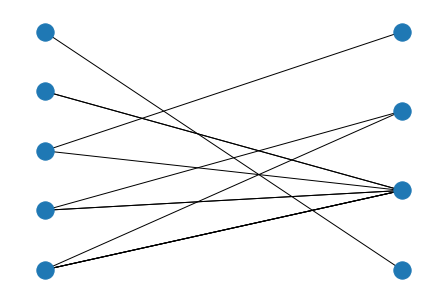

In [44]:
draw_bipartite(G)

## With power law distribution

In [45]:
a = 100
r = sp.stats.powerlaw.rvs(a, size=100)

In [110]:
s = np.random.power(15, 10)

In [111]:
degree_distrib = ((1 - s) * 100).astype(int)

In [112]:
degree_distrib

array([8, 7, 5, 4, 1, 3, 1, 7, 4, 1])

In [117]:
G = bp.preferential_attachment_graph(degree_distrib, 0.2)

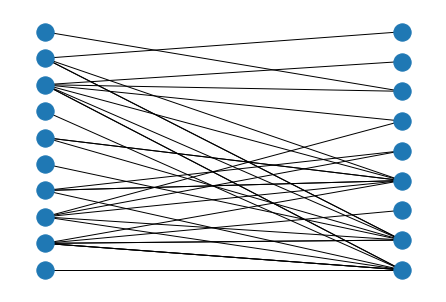

In [118]:
draw_bipartite(G)

## Random Graph

In [83]:
G = bp.random_graph(10, 12, 0.2)

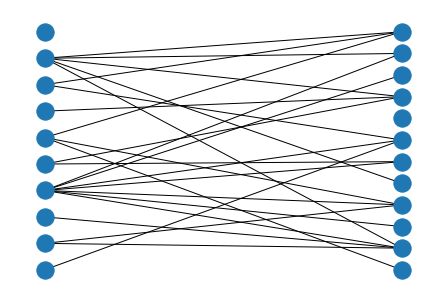

In [85]:
draw_bipartite(G)

## Complete Graphs

In [88]:
G = bp.complete_bipartite_graph(8, 15)

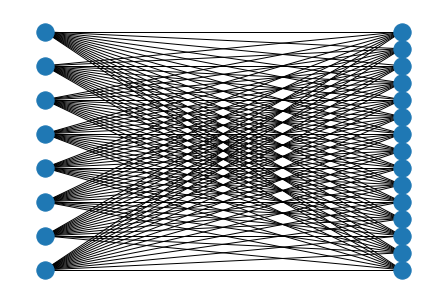

In [89]:
draw_bipartite(G)